In [1]:
import pandas as pd
import numpy as np
import matplotlib as matplot
from sklearn.preprocessing import StandardScaler

**1. Data Cleaning & Preprocessing**

In [2]:
health_cond = pd.read_csv("Health_conditions_among_children_under_age_18__by_selected_characteristics__United_States.csv")
print(health_cond.shape)
health_cond.head(10)

(2744, 16)


,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG
0,Health conditions among children under age 18,Current asthma among persons under 18 years,1,"Percent of children, crude",1,Total,0,Under 18 years,0.00,1997-1999,1,Under 18 years,0.0,NaN,NaN,...
1,Health conditions among children under age 18,Current asthma among persons under 18 years,1,"Percent of children, crude",1,Total,0,Under 18 years,0.00,2000-2002,2,Under 18 years,0.0,NaN,NaN,...
2,Health conditions among children under age 18,ADHD among persons under 18 years,3,"Percent of children, crude",1,Age,1,10-17 years,1.22,1997-1999,1,10-17 years,2.2,7.6,0.2,NaN
3,Health conditions among children under age 18,ADHD among persons under 18 years,3,"Percent of children, crude",1,Age,1,10-17 years,1.22,2000-2002,2,10-17 years,2.2,9.0,0.3,NaN
4,Health conditions among children under age 18,ADHD among persons under 18 years,3,"Percent of children, crude",1,Age,1,10-17 years,1.22,2003-2005,3,10-17 years,2.2,8.9,0.3,NaN
5,Health conditions among children under age 18,Current asthma among persons under 18 years,1,"Percent of children, crude",1,Total,0,Under 18 years,0.00,2003-2005,3,Under 18 years,0.0,8.7,0.2,NaN
6,Health conditions among children under age 18,Current asthma among persons under 18 years,1,"Percent of children, crude",1,Total,0,Under 18 years,0.00,2006-2008,4,Under 18 years,0.0,9.3,0.2,NaN
7,Health conditions among children under age 18,Current asthma among persons under 18 years,1,"Percent of children, crude",1,Total,0,Under 18 years,0.00,2007-2009,5,Under 18 years,0.0,9.4,0.2,NaN
8,Health conditions among children under age 18,Current asthma among persons under 18 years,1,"Percent of children, crude",1,Total,0,Under 18 years,0.00,2008-2010,6,Under 18 years,0.0,9.5,0.2,NaN
9,Health conditions among children under age 18,Current asthma among persons under 18 years,1,"Percent of children, crude",1,Total,0,Under 18 years,0.00,2009-2011,7,Under 18 years,0.0,9.5,0.2,NaN


In [3]:
health_cond.describe()

,PANEL_NUM,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR_NUM,AGE_NUM,ESTIMATE,SE
count,2744.000000,2744.0,2744.000000,2744.000000,2744.000000,2744.000000,2516.000000,2516.000000
mean,4.520408,1.0,3.500000,3.718980,7.500000,0.268805,8.480008,0.441852
std,2.309363,0.0,1.733839,1.737358,4.031864,0.679294,4.287880,0.364903
min,1.000000,1.0,0.000000,0.000000,1.000000,0.000000,1.100000,0.100000
25%,2.000000,1.0,2.000000,2.200000,4.000000,0.000000,5.200000,0.200000
50%,5.000000,1.0,3.000000,3.600000,7.500000,0.000000,7.100000,0.300000
75%,7.000000,1.0,5.000000,5.200000,11.000000,0.000000,11.225000,0.500000
max,8.000000,1.0,6.000000,6.200000,14.000000,2.200000,21.700000,3.000000


In [4]:
#since all the columns should have 2744 values, the Estimate, SE and Flag contains the null value.
#and the data are collected by the idea type, so there is no need to change the type of the variables.
health_cond[['YEAR1', 'YEAR2']] = health_cond['YEAR'].str.split('-', expand=True)
health_cond[['YEAR1', 'YEAR2']] = health_cond[['YEAR1', 'YEAR2']].astype(int)
health_cond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2744 entries, 0 to 2743
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       2744 non-null   object 
 1   PANEL           2744 non-null   object 
 2   PANEL_NUM       2744 non-null   int64  
 3   UNIT            2744 non-null   object 
 4   UNIT_NUM        2744 non-null   int64  
 5   STUB_NAME       2744 non-null   object 
 6   STUB_NAME_NUM   2744 non-null   int64  
 7   STUB_LABEL      2744 non-null   object 
 8   STUB_LABEL_NUM  2744 non-null   float64
 9   YEAR            2744 non-null   object 
 10  YEAR_NUM        2744 non-null   int64  
 11  AGE             2744 non-null   object 
 12  AGE_NUM         2744 non-null   float64
 13  ESTIMATE        2516 non-null   float64
 14  SE              2516 non-null   float64
 15  FLAG            287 non-null    object 
 16  YEAR1           2744 non-null   int64  
 17  YEAR2           2744 non-null   i

In [5]:
health_cond.isna().sum()

INDICATOR            0
PANEL                0
PANEL_NUM            0
UNIT                 0
UNIT_NUM             0
STUB_NAME            0
STUB_NAME_NUM        0
STUB_LABEL           0
STUB_LABEL_NUM       0
YEAR                 0
YEAR_NUM             0
AGE                  0
AGE_NUM              0
ESTIMATE           228
SE                 228
FLAG              2457
YEAR1                0
YEAR2                0
dtype: int64

In [6]:
health_cond_no_duplicates = health_cond.drop_duplicates()
health_cond_no_duplicates.shape
#Thus there is no duplicated data in the dataset, so we can do the further action on the dataset.

(2744, 18)

In [7]:
health_cond['ESTIMATE'].fillna(health_cond['ESTIMATE'].mean(), inplace=True)
health_cond['SE'].fillna(health_cond['SE'].median(), inplace=True)
health_cond['FLAG'].fillna(" ", inplace=True)

In [8]:
health_cond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2744 entries, 0 to 2743
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       2744 non-null   object 
 1   PANEL           2744 non-null   object 
 2   PANEL_NUM       2744 non-null   int64  
 3   UNIT            2744 non-null   object 
 4   UNIT_NUM        2744 non-null   int64  
 5   STUB_NAME       2744 non-null   object 
 6   STUB_NAME_NUM   2744 non-null   int64  
 7   STUB_LABEL      2744 non-null   object 
 8   STUB_LABEL_NUM  2744 non-null   float64
 9   YEAR            2744 non-null   object 
 10  YEAR_NUM        2744 non-null   int64  
 11  AGE             2744 non-null   object 
 12  AGE_NUM         2744 non-null   float64
 13  ESTIMATE        2744 non-null   float64
 14  SE              2744 non-null   float64
 15  FLAG            2744 non-null   object 
 16  YEAR1           2744 non-null   int64  
 17  YEAR2           2744 non-null   i

In [9]:
#detect the outlier value from the dataset
numerical_values = ['PANEL_NUM', 'UNIT_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'YEAR_NUM', 'AGE_NUM', 'ESTIMATE', 'SE', 'YEAR1', 'YEAR2']
outlier_values = (health_cond[numerical_values] - health_cond[numerical_values].mean()).abs() > 3 * health_cond[numerical_values].std()
health_cond = health_cond[~outlier_values.any(axis=1)]
health_cond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2655 entries, 0 to 2743
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       2655 non-null   object 
 1   PANEL           2655 non-null   object 
 2   PANEL_NUM       2655 non-null   int64  
 3   UNIT            2655 non-null   object 
 4   UNIT_NUM        2655 non-null   int64  
 5   STUB_NAME       2655 non-null   object 
 6   STUB_NAME_NUM   2655 non-null   int64  
 7   STUB_LABEL      2655 non-null   object 
 8   STUB_LABEL_NUM  2655 non-null   float64
 9   YEAR            2655 non-null   object 
 10  YEAR_NUM        2655 non-null   int64  
 11  AGE             2655 non-null   object 
 12  AGE_NUM         2655 non-null   float64
 13  ESTIMATE        2655 non-null   float64
 14  SE              2655 non-null   float64
 15  FLAG            2655 non-null   object 
 16  YEAR1           2655 non-null   int64  
 17  YEAR2           2655 non-null   i

In [10]:
#standardize the numerical value in order to be used by the advanced analysis in the further action
scaler = StandardScaler()
health_cond_adv = health_cond.copy()
health_cond_adv[numerical_values] = scaler.fit_transform(health_cond_adv[numerical_values])
health_cond_adv.head(10)

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG,YEAR1,YEAR2
0,Health conditions among children under age 18,Current asthma among persons under 18 years,-1.518622,"Percent of children, crude",0.0,Total,-2.002775,Under 18 years,-2.119600,1997-1999,-1.614221,Under 18 years,-0.400926,0.025098,-0.377643,...,-2.140784,-2.140784
1,Health conditions among children under age 18,Current asthma among persons under 18 years,-1.518622,"Percent of children, crude",0.0,Total,-2.002775,Under 18 years,-2.119600,2000-2002,-1.366232,Under 18 years,-0.400926,0.025098,-0.377643,...,-1.589460,-1.589460
2,Health conditions among children under age 18,ADHD among persons under 18 years,-0.652097,"Percent of children, crude",0.0,Age,-1.433647,10-17 years,-1.427029,1997-1999,-1.614221,10-17 years,2.812312,-0.192104,-0.839478,,-2.140784,-2.140784
3,Health conditions among children under age 18,ADHD among persons under 18 years,-0.652097,"Percent of children, crude",0.0,Age,-1.433647,10-17 years,-1.427029,2000-2002,-1.366232,10-17 years,2.812312,0.153442,-0.377643,,-1.589460,-1.589460
4,Health conditions among children under age 18,ADHD among persons under 18 years,-0.652097,"Percent of children, crude",0.0,Age,-1.433647,10-17 years,-1.427029,2003-2005,-1.118242,10-17 years,2.812312,0.128760,-0.377643,,-1.038136,-1.038136
5,Health conditions among children under age 18,Current asthma among persons under 18 years,-1.518622,"Percent of children, crude",0.0,Total,-2.002775,Under 18 years,-2.119600,2003-2005,-1.118242,Under 18 years,-0.400926,0.079397,-0.839478,,-1.038136,-1.038136
6,Health conditions among children under age 18,Current asthma among persons under 18 years,-1.518622,"Percent of children, crude",0.0,Total,-2.002775,Under 18 years,-2.119600,2006-2008,-0.870252,Under 18 years,-0.400926,0.227488,-0.839478,,-0.486812,-0.486812
7,Health conditions among children under age 18,Current asthma among persons under 18 years,-1.518622,"Percent of children, crude",0.0,Total,-2.002775,Under 18 years,-2.119600,2007-2009,-0.622263,Under 18 years,-0.400926,0.252170,-0.839478,,-0.303038,-0.303038
8,Health conditions among children under age 18,Current asthma among persons under 18 years,-1.518622,"Percent of children, crude",0.0,Total,-2.002775,Under 18 years,-2.119600,2008-2010,-0.374273,Under 18 years,-0.400926,0.276852,-0.839478,,-0.119263,-0.119263
9,Health conditions among children under age 18,Current asthma among persons under 18 years,-1.518622,"Percent of children, crude",0.0,Total,-2.002775,Under 18 years,-2.119600,2009-2011,-0.126283,Under 18 years,-0.400926,0.276852,-0.839478,,0.064511,0.064511


In [11]:
print("\nStatistic Analysis:", health_cond.head())
print("\nAdvanced Analysis:", health_cond_adv.head())


Statistic Analysis:                                        INDICATOR  \
0  Health conditions among children under age 18   
1  Health conditions among children under age 18   
2  Health conditions among children under age 18   
3  Health conditions among children under age 18   
4  Health conditions among children under age 18   

                                         PANEL  PANEL_NUM  \
0  Current asthma among persons under 18 years          1   
1  Current asthma among persons under 18 years          1   
2            ADHD among persons under 18 years          3   
3            ADHD among persons under 18 years          3   
4            ADHD among persons under 18 years          3   

                         UNIT  UNIT_NUM STUB_NAME  STUB_NAME_NUM  \
0  Percent of children, crude         1     Total              0   
1  Percent of children, crude         1     Total              0   
2  Percent of children, crude         1       Age              1   
3  Percent of children, cru

In [12]:
import pandas as pd

# Set option to display all columns
pd.set_option('display.max_columns', None)

# Display the first 5 rows of the DataFrame
print(health_cond.head())


                                       INDICATOR  \
0  Health conditions among children under age 18   
1  Health conditions among children under age 18   
2  Health conditions among children under age 18   
3  Health conditions among children under age 18   
4  Health conditions among children under age 18   

                                         PANEL  PANEL_NUM  \
0  Current asthma among persons under 18 years          1   
1  Current asthma among persons under 18 years          1   
2            ADHD among persons under 18 years          3   
3            ADHD among persons under 18 years          3   
4            ADHD among persons under 18 years          3   

                         UNIT  UNIT_NUM STUB_NAME  STUB_NAME_NUM  \
0  Percent of children, crude         1     Total              0   
1  Percent of children, crude         1     Total              0   
2  Percent of children, crude         1       Age              1   
3  Percent of children, crude         1       Ag

Bar chart of age distribution


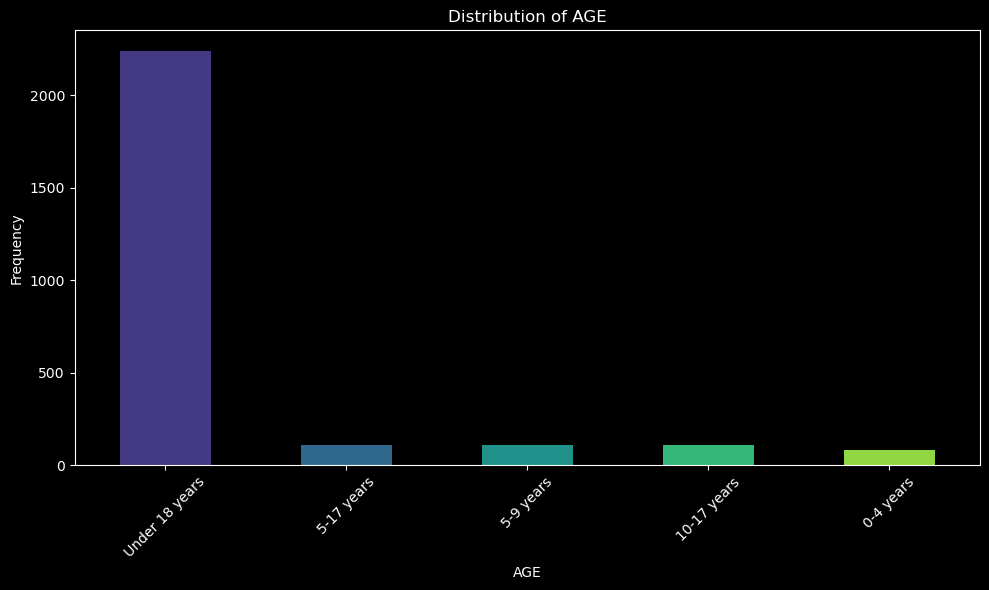

In [113]:
plt.style.use('dark_background')

colors = sns.color_palette('viridis', len(health_cond['AGE'].unique()))

plt.figure(figsize=(10, 6))  
health_cond['AGE'].value_counts().plot(kind='bar', color=colors)

plt.title('Distribution of AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')

plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

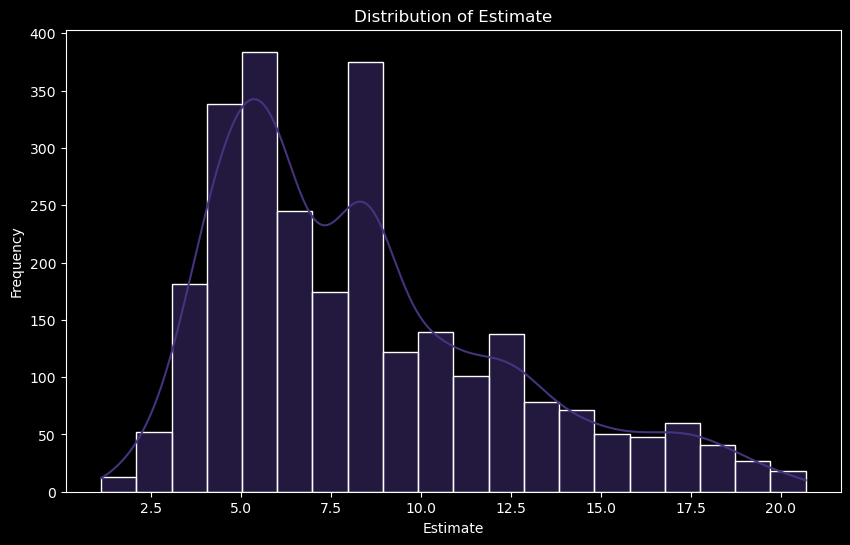

In [114]:
plt.style.use('dark_background')

colors = sns.color_palette('viridis')

plt.figure(figsize=(10, 6))
sns.histplot(health_cond['ESTIMATE'], bins=20, kde=True, color=colors[0])
plt.title('Distribution of Estimate')
plt.xlabel('Estimate')
plt.ylabel('Frequency')
plt.show()

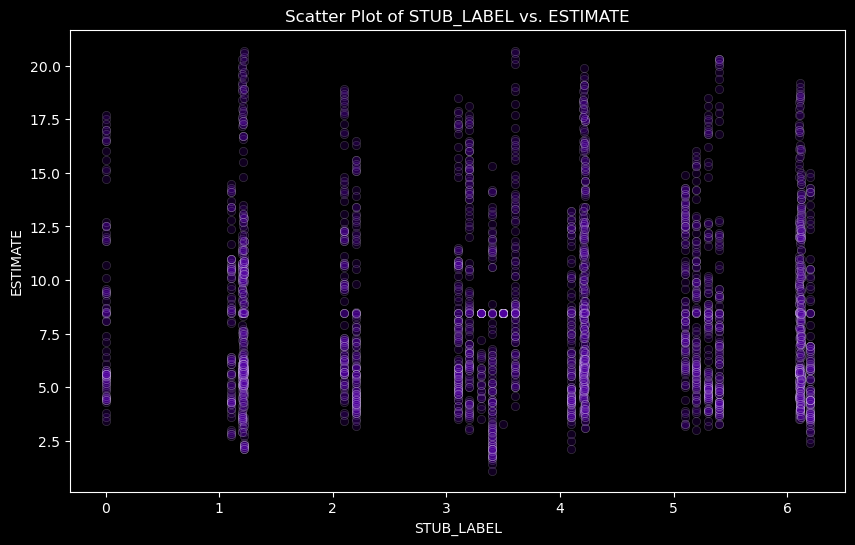

In [115]:
plt.style.use('dark_background')
colors = sns.color_palette('plasma')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='STUB_LABEL_NUM', y='ESTIMATE', data=health_cond, color=colors[0], alpha=0.2)
plt.title('Scatter Plot of STUB_LABEL vs. ESTIMATE')
plt.xlabel('STUB_LABEL')
plt.ylabel('ESTIMATE')
plt.show()

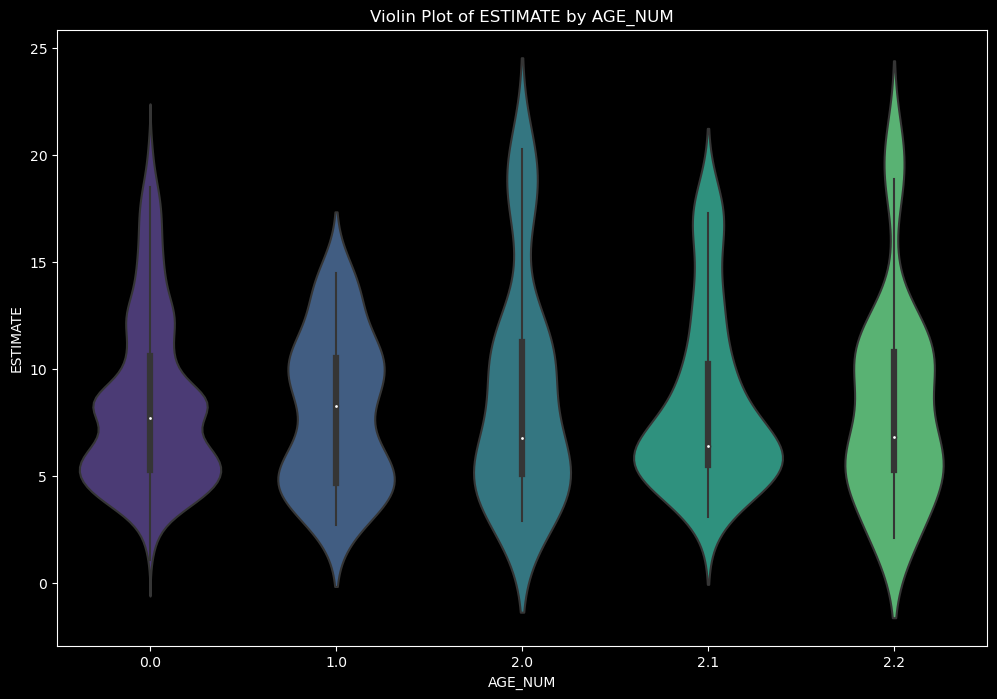

In [116]:
plt.style.use('dark_background')
colors = sns.color_palette('viridis')

plt.figure(figsize=(12, 8))
sns.violinplot(x='AGE_NUM', y='ESTIMATE', data=health_cond, palette=colors)
plt.title('Violin Plot of ESTIMATE by AGE_NUM')
plt.xlabel('AGE_NUM')
plt.ylabel('ESTIMATE')
plt.show()

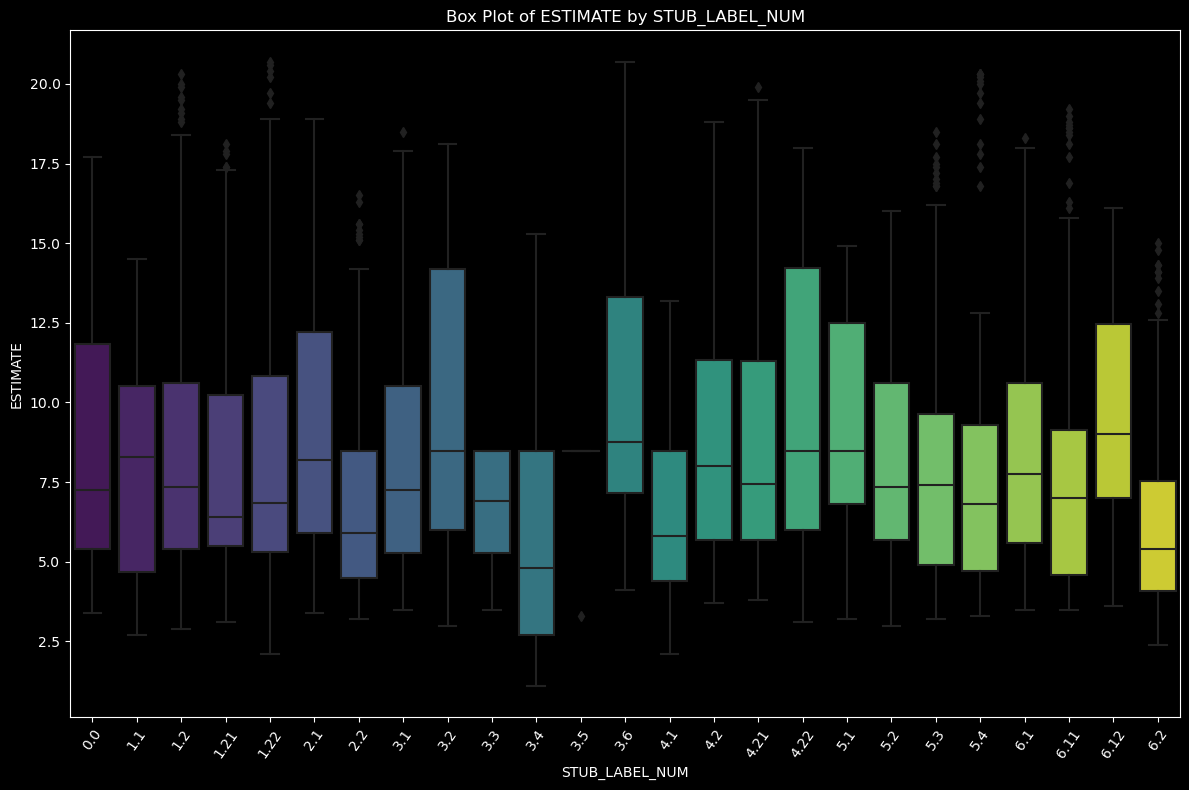

In [117]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='STUB_LABEL_NUM', y='ESTIMATE', data=health_cond, palette='viridis')
plt.title('Box Plot of ESTIMATE by STUB_LABEL_NUM')
plt.xlabel('STUB_LABEL_NUM')
plt.ylabel('ESTIMATE')
plt.xticks(rotation=55)  
plt.tight_layout()  
plt.show()

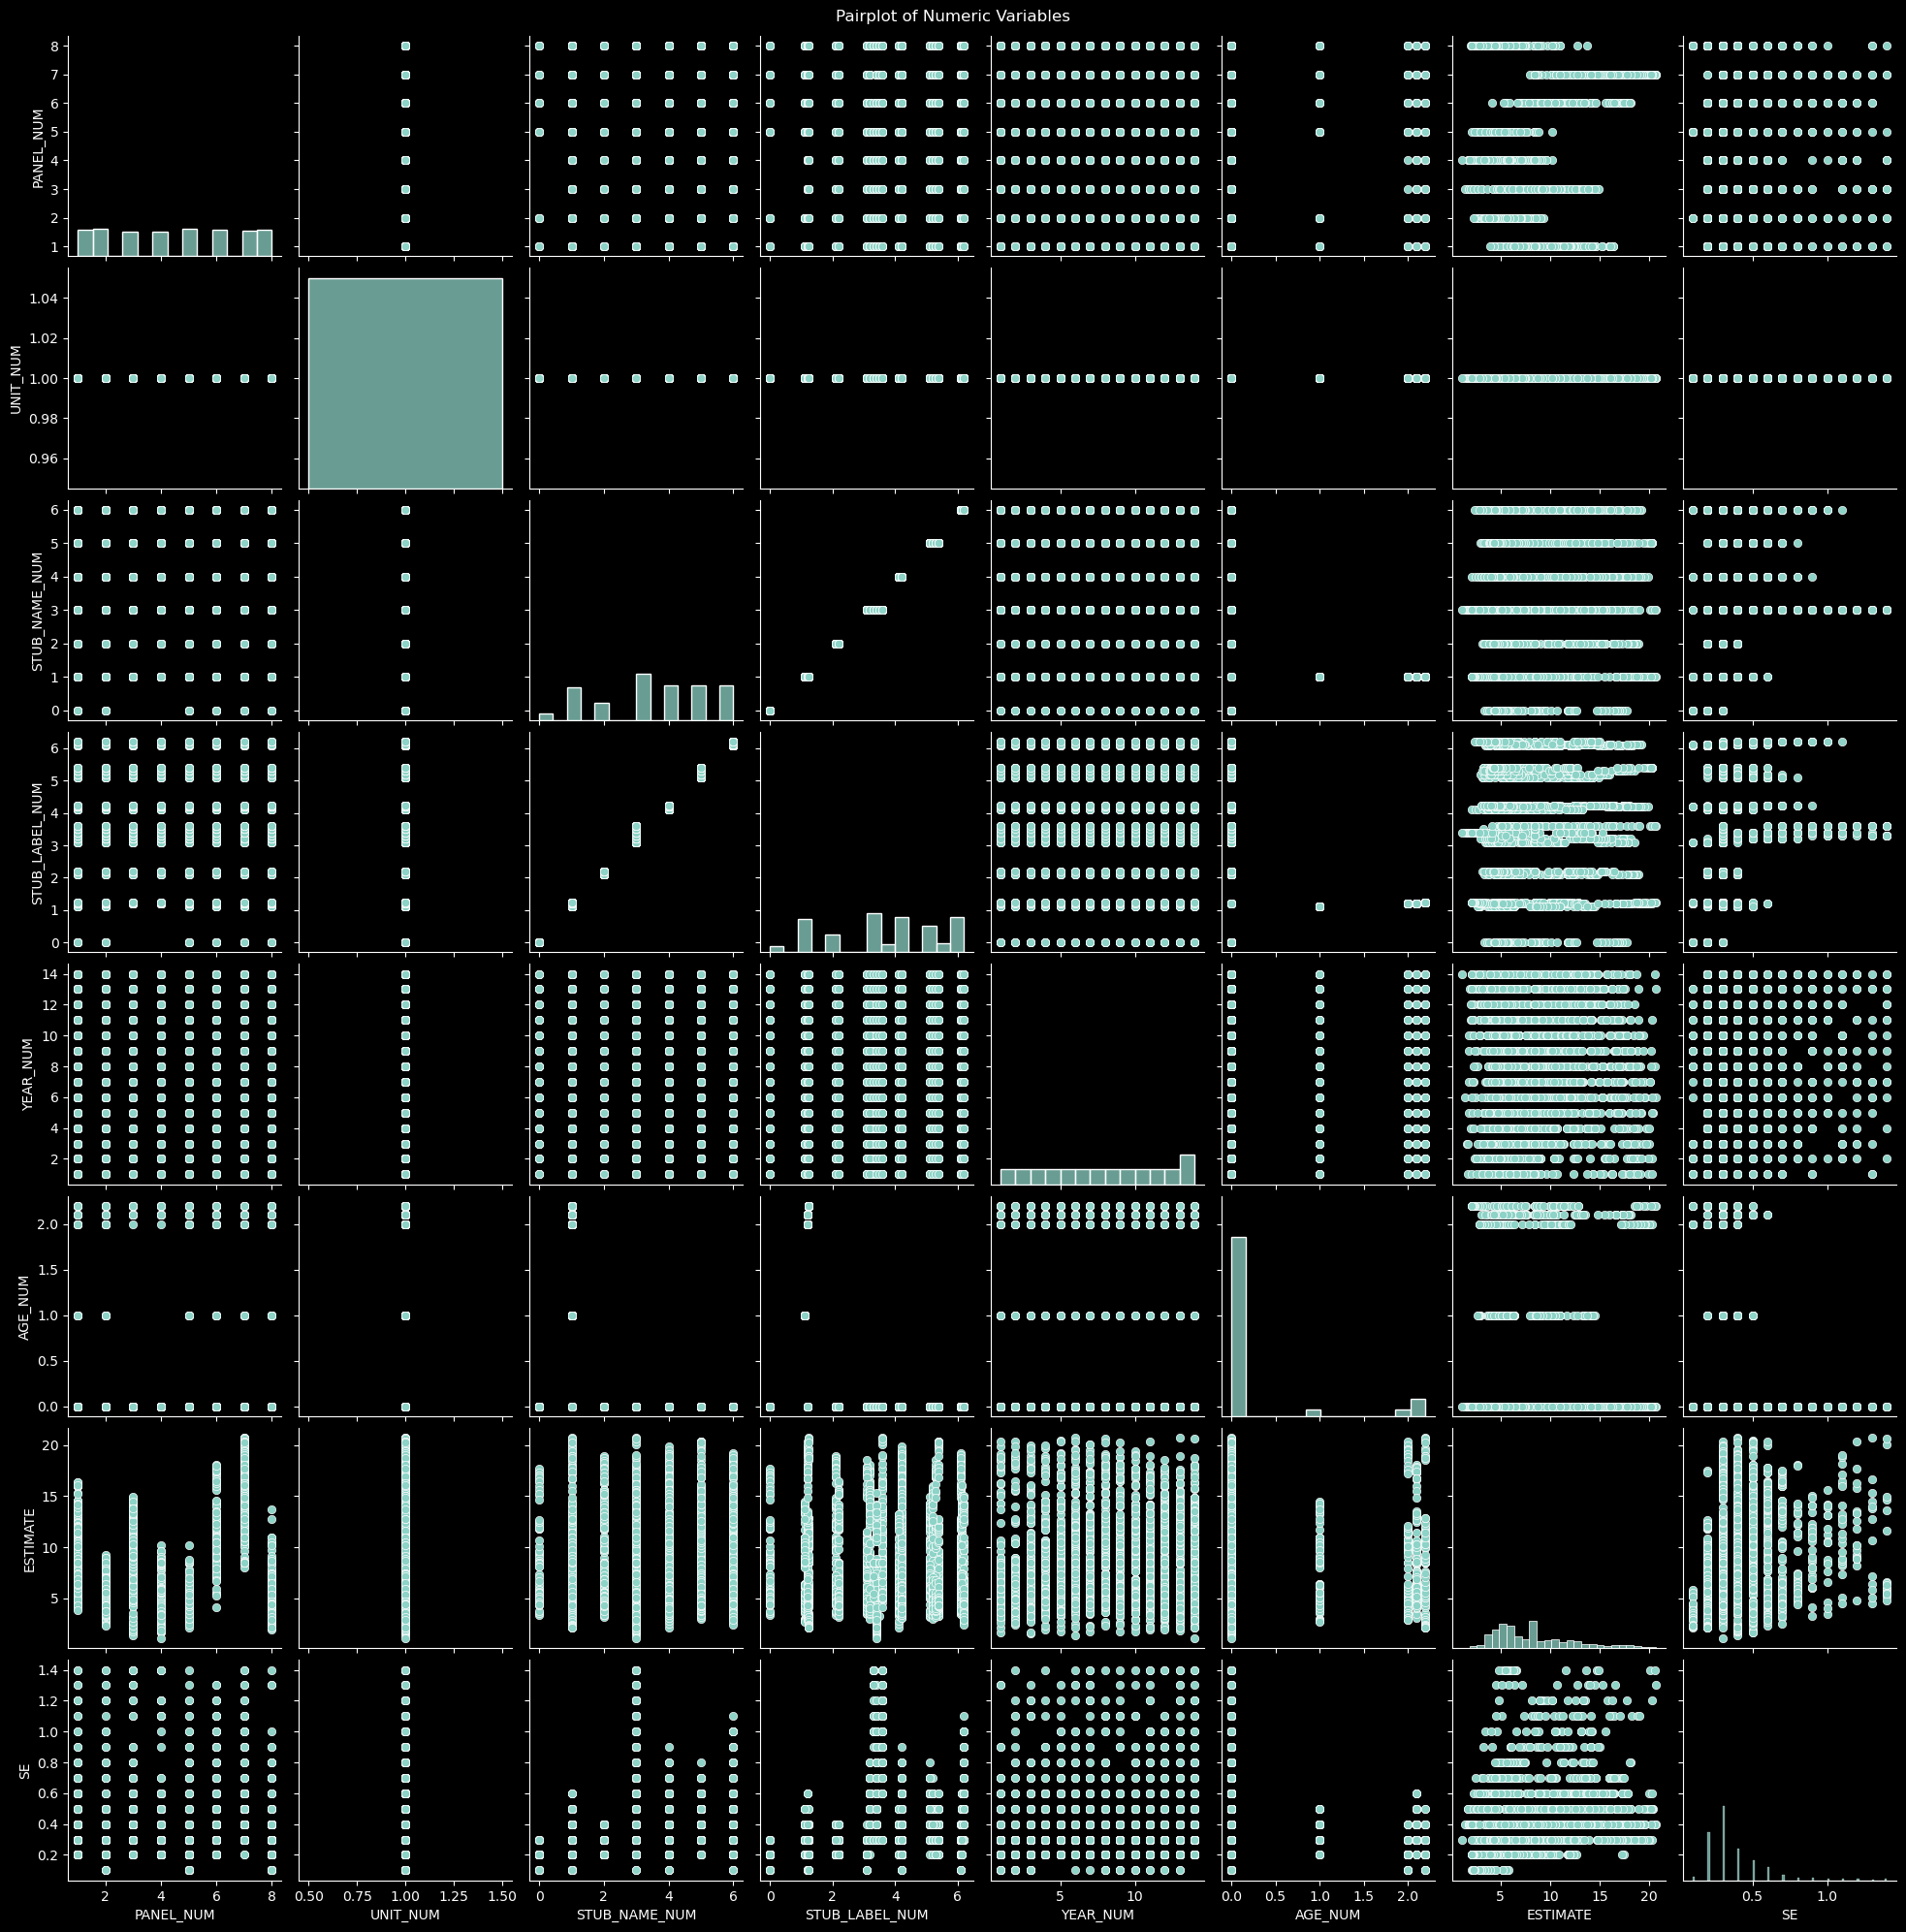

In [120]:
plt.style.use('dark_background')

sns.pairplot(health_cond[['PANEL_NUM', 'UNIT_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'YEAR_NUM', 'AGE_NUM', 'ESTIMATE', 'SE']])
plt.suptitle('Pairplot of Numeric Variables', y=1)
plt.show()

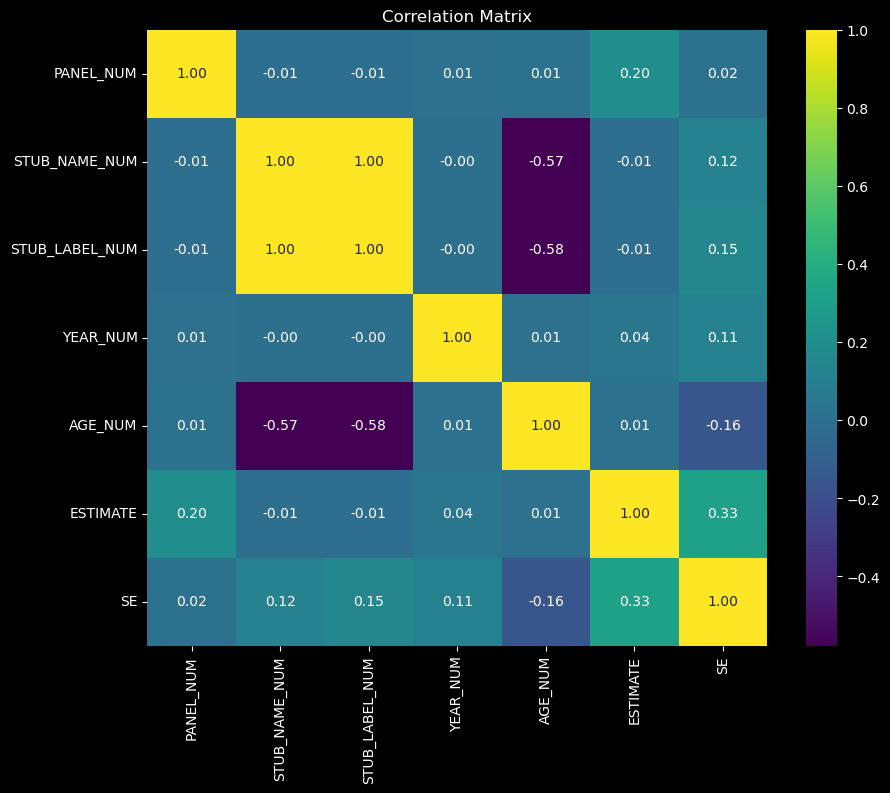

In [121]:
plt.style.use('dark_background')
correlation_matrix = health_cond[['PANEL_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'YEAR_NUM', 'AGE_NUM', 'ESTIMATE', 'SE']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = health_cond_adv[['PANEL_NUM', 'STUB_LABEL_NUM','YEAR_NUM','AGE_NUM',]]
y = health_cond_adv['ESTIMATE']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)

coef = model.coef_
intercept = model.intercept_
print("Equation: ESTIMATES = {:.2f} * PANEL_NUM + {:.2f} * STUB_LABEL_NUM + {:.2f} * YEAR_NUM + {:.2f} * AGE_NUM + {:.2f}".format(coef[0], coef[1], coef[2], coef[3],intercept))

Mean Squared Error: 0.9640962193316243
Equation: ESTIMATES = 0.20 * PANEL_NUM + -0.03 * STUB_LABEL_NUM + 0.05 * YEAR_NUM + -0.00 * AGE_NUM + 0.01


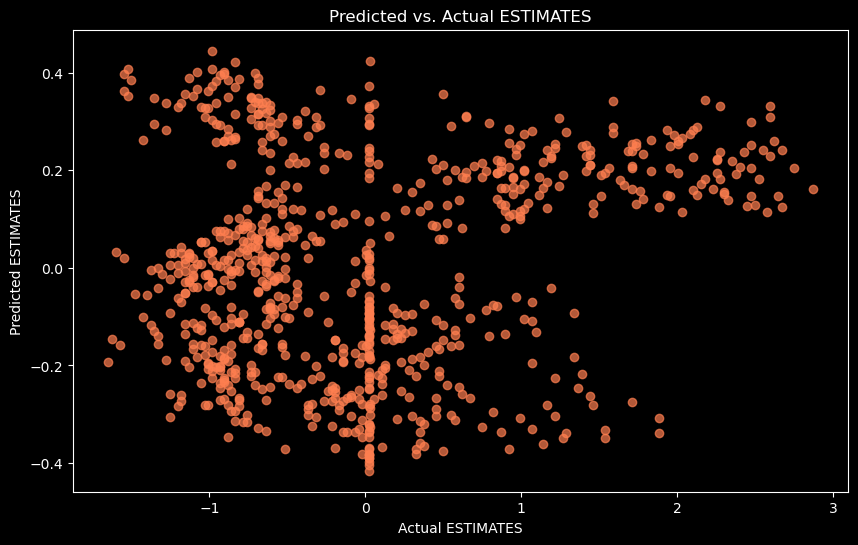

In [110]:
plt.style.use('dark_background')

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='coral', alpha=0.7)  
plt.title('Predicted vs. Actual ESTIMATES')
plt.xlabel('Actual ESTIMATES')
plt.ylabel('Predicted ESTIMATES')
plt.show()

/var/folders/q_/05yg3r0d1gq2fwf6bgcxb24h0000gq/T/ipykernel_7509/1423562088.py:8: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

/var/folders/q_/05yg3r0d1gq2fwf6bgcxb24h0000gq/T/ipykernel_7509/1423562088.py:9: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



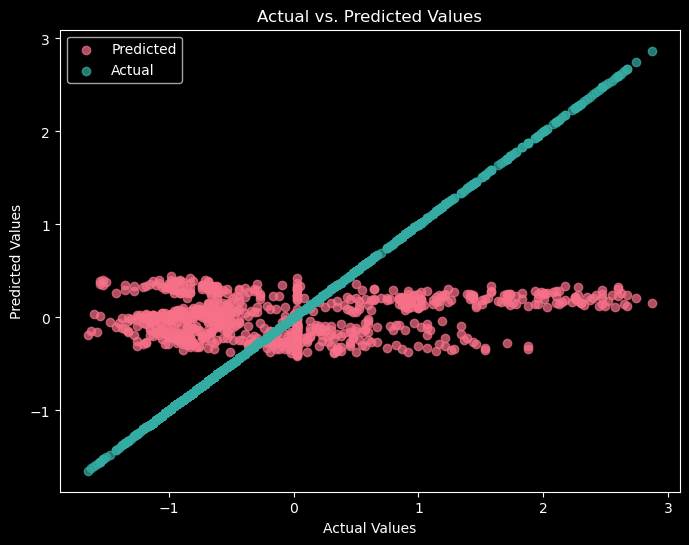

In [108]:
plt.style.use('dark_background')

# Define a custom color palette
colors = sns.color_palette('husl', 2)

# Create a scatter plot with translucent points
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, c=colors[0], label='Predicted', alpha=0.7)  # Plot predicted values
plt.scatter(y_val, y_val, c=colors[1], label='Actual', alpha=0.7)  # Plot actual values

# Add labels and title
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show plot
plt.show()

In [106]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

y_pred_ridge= ridge.predict(X_val)
mse_ridge= mean_squared_error(y_val, y_pred_ridge)
print("Mean Squared Error:", mse_ridge)

Mean Squared Error: 0.9640877342080112


/var/folders/q_/05yg3r0d1gq2fwf6bgcxb24h0000gq/T/ipykernel_7509/3730680351.py:5: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

/var/folders/q_/05yg3r0d1gq2fwf6bgcxb24h0000gq/T/ipykernel_7509/3730680351.py:6: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



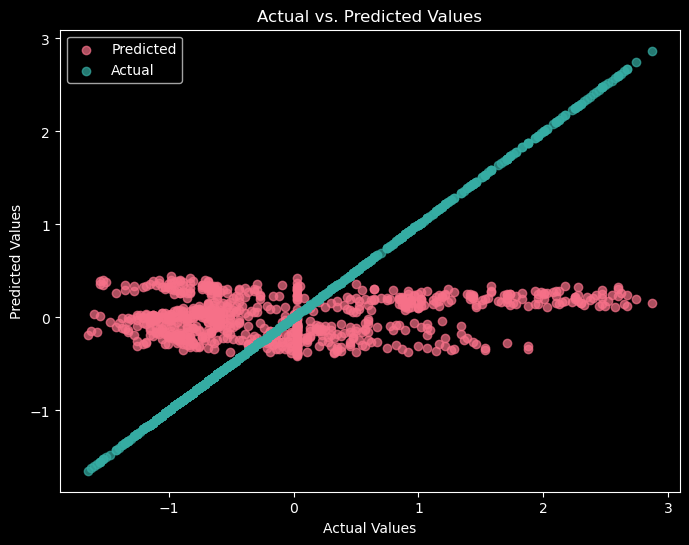

In [105]:
plt.style.use('dark_background')
colors = sns.color_palette('husl', 2)

plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_ridge, c=colors[0], label='Predicted', alpha=0.7)  
plt.scatter(y_val, y_val, c=colors[1], label='Actual', alpha=0.7)  

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

/var/folders/q_/05yg3r0d1gq2fwf6bgcxb24h0000gq/T/ipykernel_7509/3605242928.py:5: UserWarning:


The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.



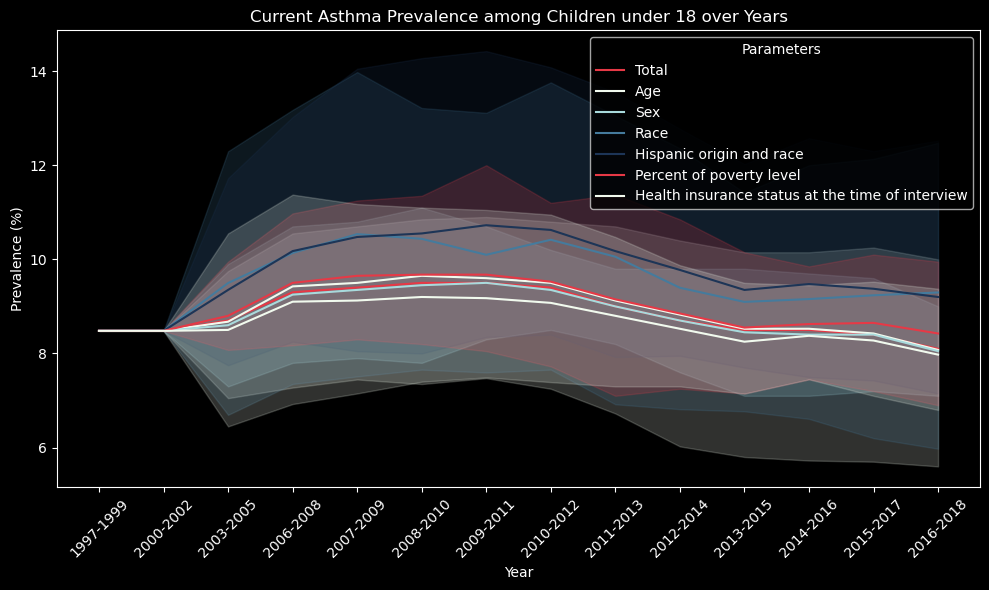

In [128]:
plt.style.use('dark_background')
colors = ["#E63946", "#F1FAEE", "#A8DADC", "#457B9D", "#1D3557"]

plt.figure(figsize=(10, 6))
sns.lineplot(data=health_cond[health_cond['PANEL'] == 'Current asthma among persons under 18 years'], 
             x='YEAR', y='ESTIMATE', hue='STUB_NAME', palette=colors)
plt.title('Current Asthma Prevalence among Children under 18 over Years')
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.legend(title='Parameters')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


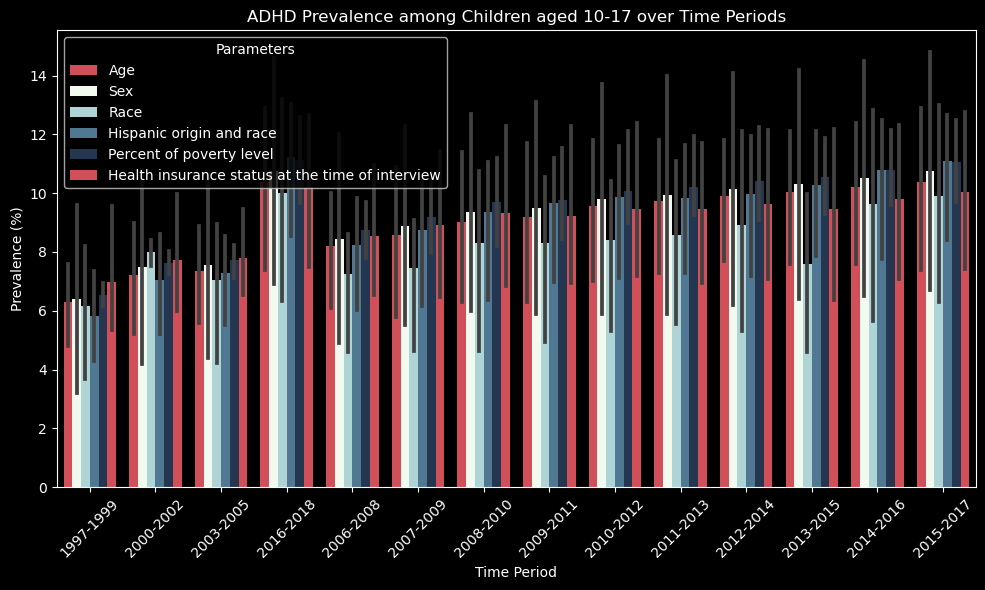

In [129]:
plt.figure(figsize=(10, 6))
sns.barplot(data=health_cond[health_cond['PANEL'] == 'ADHD among persons under 18 years'], 
            x='YEAR', y='ESTIMATE', hue='STUB_NAME', palette=colors)
plt.title('ADHD Prevalence among Children aged 10-17 over Time Periods')
plt.xlabel('Time Period')
plt.ylabel('Prevalence (%)')
plt.xticks(rotation=45)  
plt.legend(title='Parameters')
plt.tight_layout()
plt.show()

/var/folders/q_/05yg3r0d1gq2fwf6bgcxb24h0000gq/T/ipykernel_7509/3161471948.py:2: UserWarning:

The palette list has more values (5) than needed (1), which may not be intended.



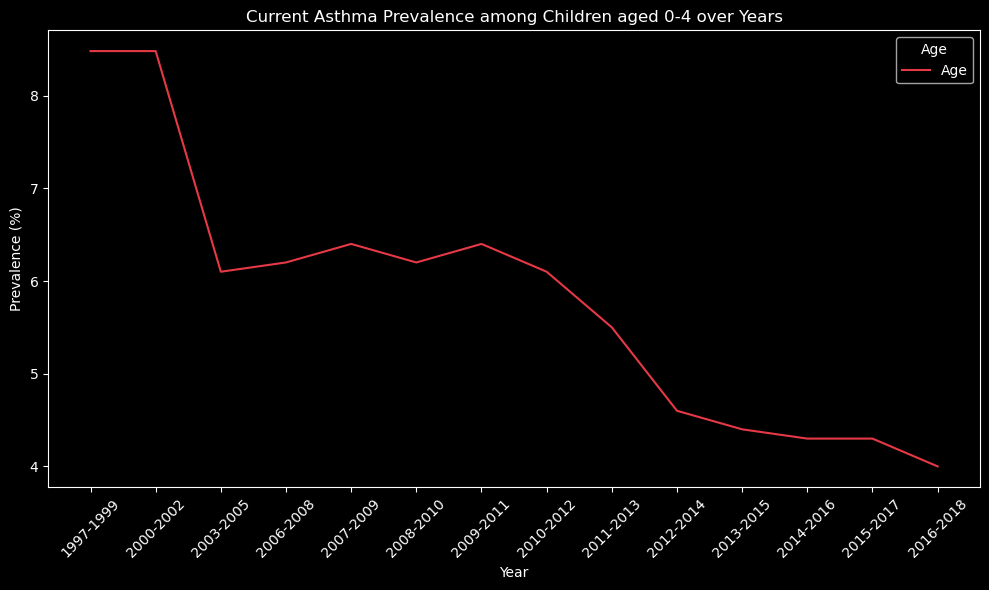

In [85]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=health_cond[(health_cond['PANEL'] == 'Current asthma among persons under 18 years') & 
                              (health_cond['AGE'] == '0-4 years')], 
             x='YEAR', y='ESTIMATE', hue='STUB_NAME', palette=colors)
plt.title('Current Asthma Prevalence among Children aged 0-4 over Years')
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.legend(title='Age')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


/var/folders/q_/05yg3r0d1gq2fwf6bgcxb24h0000gq/T/ipykernel_7509/21684195.py:2: UserWarning:

The palette list has more values (5) than needed (1), which may not be intended.



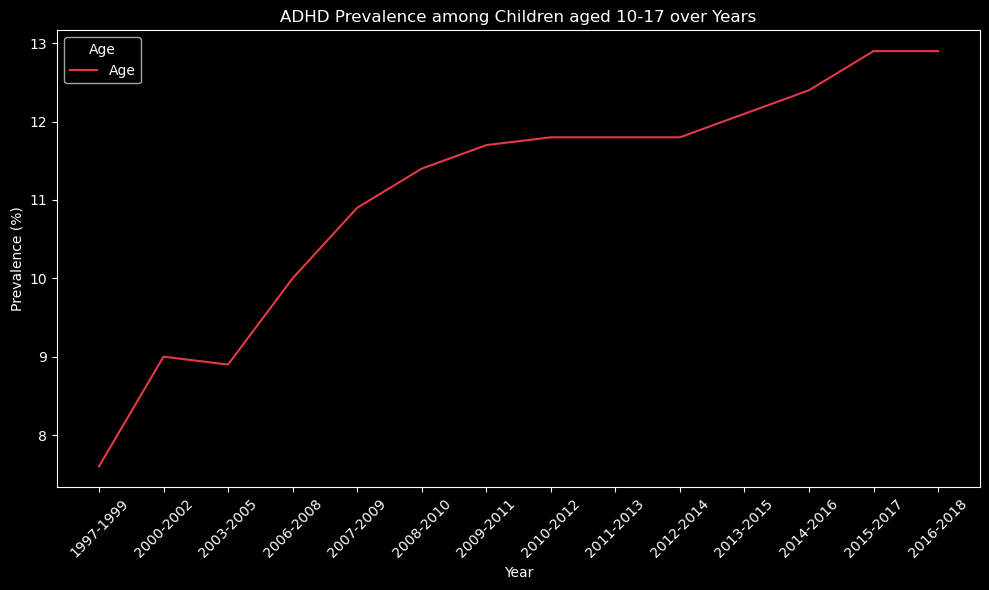

In [86]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=health_cond[(health_cond['PANEL'] == 'ADHD among persons under 18 years') & 
                              (health_cond['AGE'] == '10-17 years')], 
             x='YEAR', y='ESTIMATE', hue='STUB_NAME', palette=colors)
plt.title('ADHD Prevalence among Children aged 10-17 over Years')
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.legend(title='Age')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


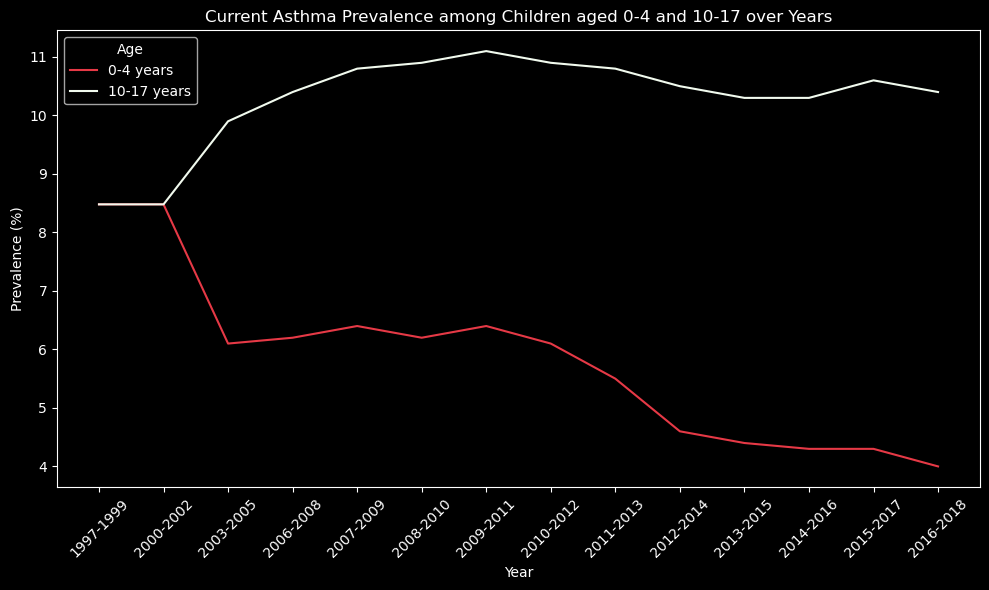

In [87]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=health_cond[(health_cond['PANEL'] == 'Current asthma among persons under 18 years') & 
                              ((health_cond['AGE'] == '0-4 years') | (health_cond['AGE'] == '10-17 years'))], 
             x='YEAR', y='ESTIMATE', hue='AGE', palette=colors[:2])
plt.title('Current Asthma Prevalence among Children aged 0-4 and 10-17 over Years')
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.legend(title='Age')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


In [88]:
unique_panels = health_cond['PANEL'].unique()
print(unique_panels)

['Current asthma among persons under 18 years'
 'ADHD among persons under 18 years'
 'Asthma attack in last 12 months among persons under 18 years'
 'Serious emotional or behavioral difficulties among persons under 18 years'
 'Food allergy among persons under 18 years'
 'Skin allergy among persons under 18 years'
 'Hay fever or respiratory allergy among persons under 18 years'
 'Ear infections among persons under 18 years']


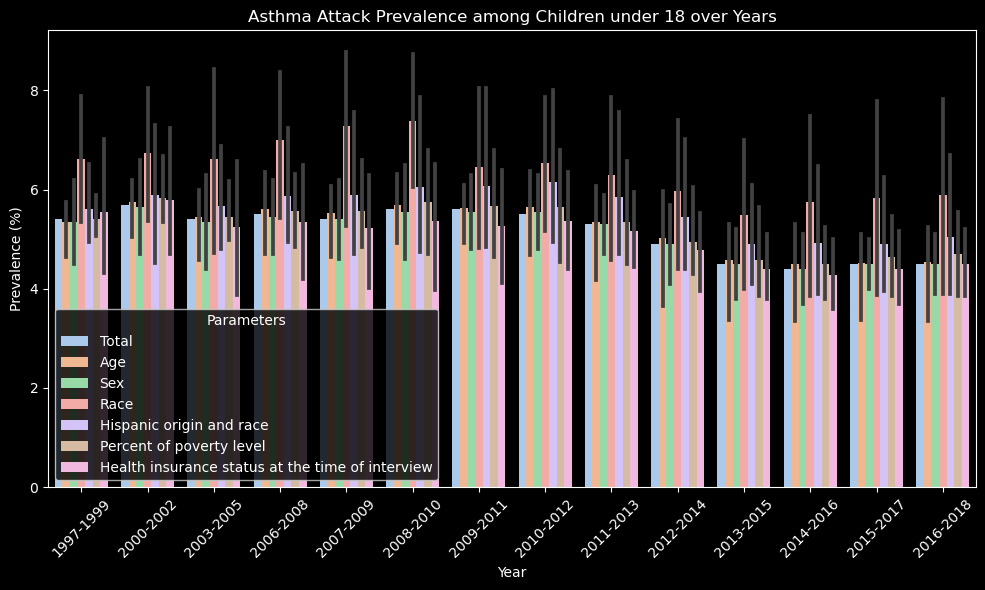

In [127]:
palettes = ["pastel", "muted", "deep", "bright", "dark"]

plt.figure(figsize=(10, 6))
sns.barplot(data=health_cond[health_cond['PANEL'] == 'Asthma attack in last 12 months among persons under 18 years'], 
            x='YEAR', y='ESTIMATE', hue='STUB_NAME', palette=palettes[0])
plt.title('Asthma Attack Prevalence among Children under 18 over Years')
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.legend(title='Parameters')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

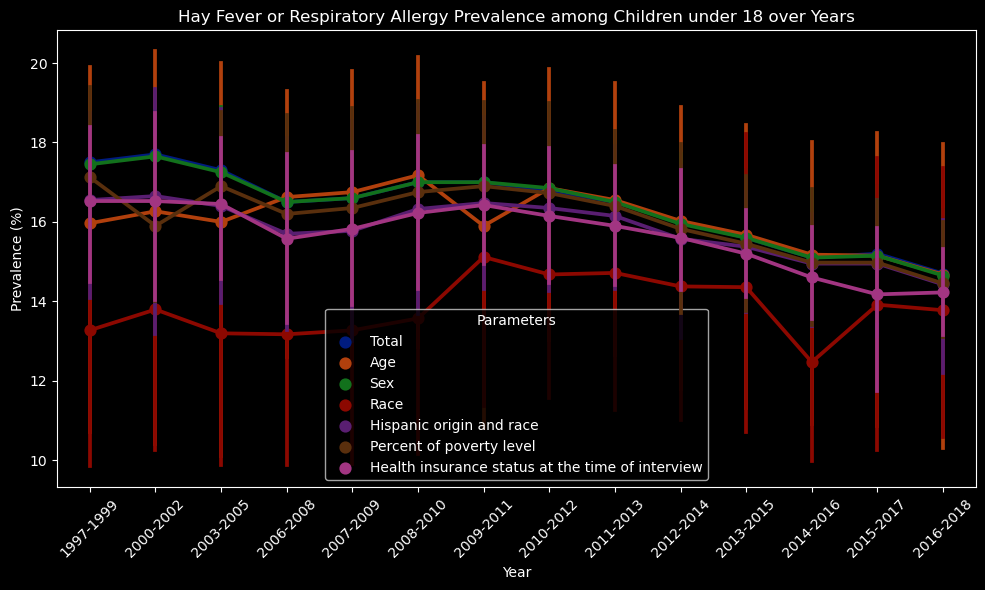

In [126]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=health_cond[health_cond['PANEL'] == 'Hay fever or respiratory allergy among persons under 18 years'], 
              x='YEAR', y='ESTIMATE', hue='STUB_NAME', palette=palettes[4])
plt.title('Hay Fever or Respiratory Allergy Prevalence among Children under 18 over Years')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Prevalence (%)')
plt.legend(title='Parameters')
plt.tight_layout()
plt.show()

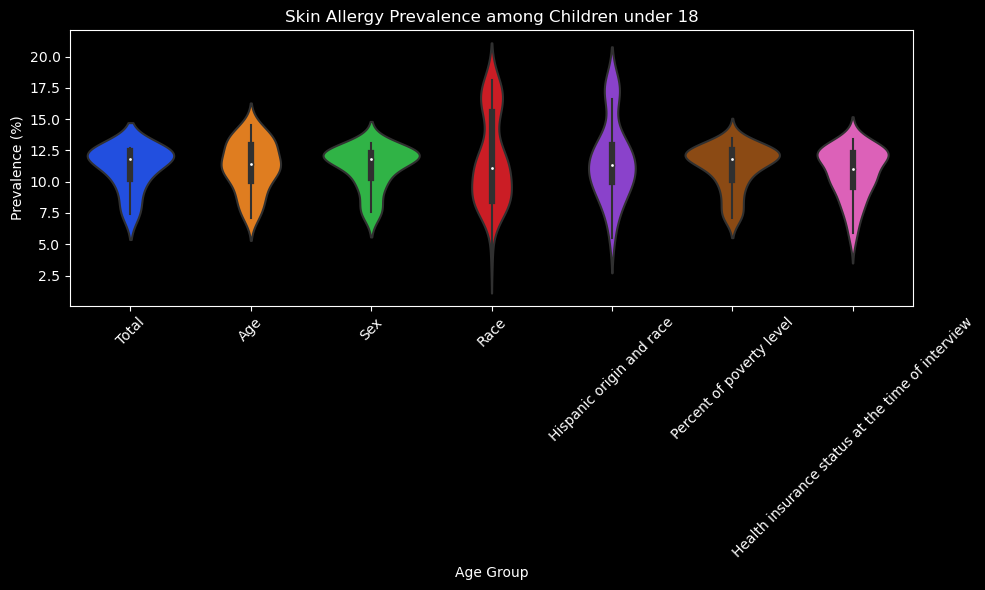

In [91]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=health_cond[health_cond['PANEL'] == 'Skin allergy among persons under 18 years'], 
               x='STUB_NAME', y='ESTIMATE', palette=palettes[3])
plt.title('Skin Allergy Prevalence among Children under 18')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.ylabel('Prevalence (%)')
plt.tight_layout()
plt.show()

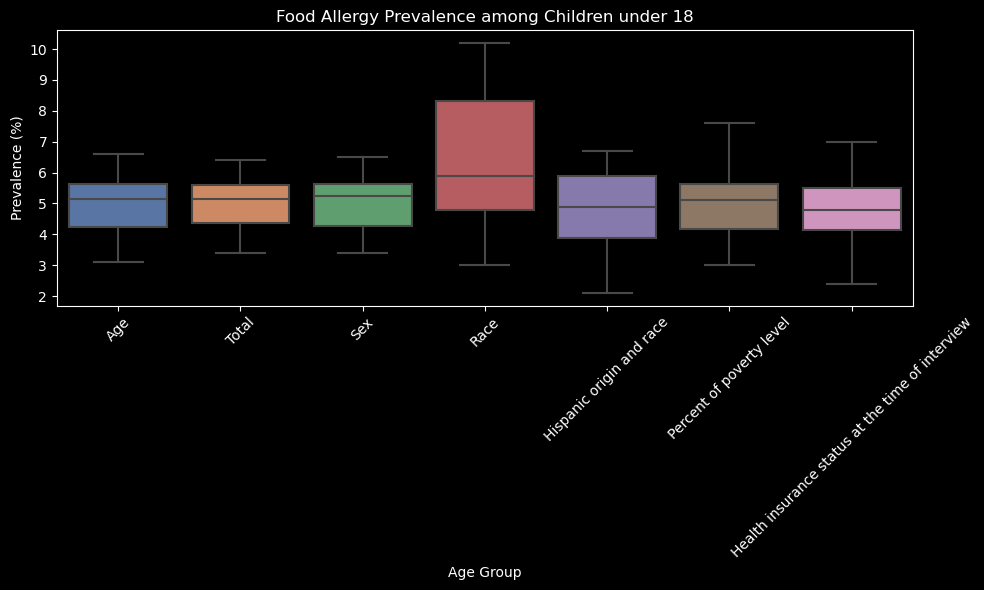

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=health_cond[health_cond['PANEL'] == 'Food allergy among persons under 18 years'], 
            x='STUB_NAME', y='ESTIMATE', palette=palettes[2])
plt.title('Food Allergy Prevalence among Children under 18')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.ylabel('Prevalence (%)')
plt.tight_layout()
plt.show()

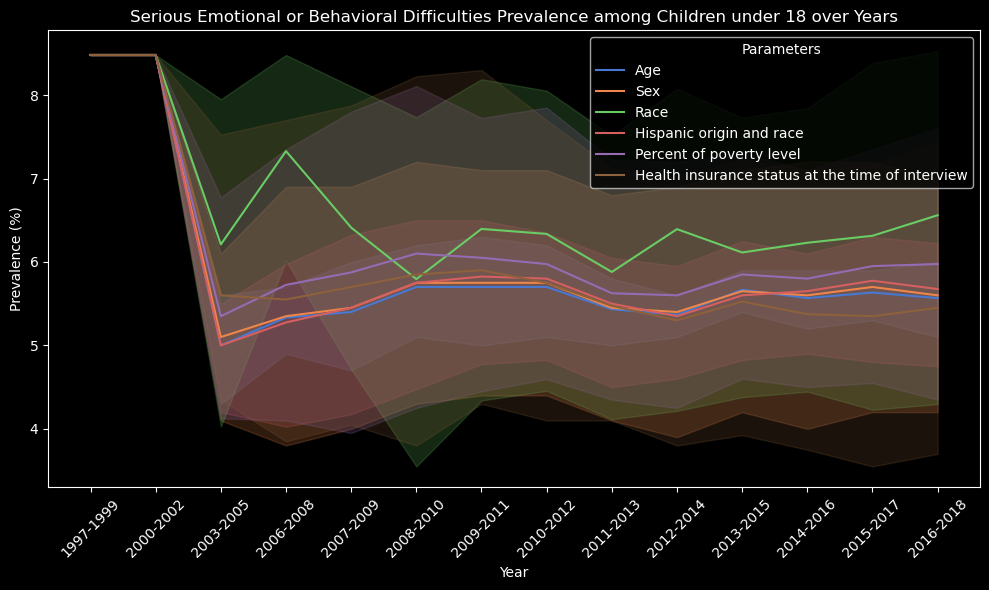

In [125]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=health_cond[health_cond['PANEL'] == 'Serious emotional or behavioral difficulties among persons under 18 years'], 
             x='YEAR', y='ESTIMATE', hue='STUB_NAME', palette=palettes[1])
plt.title('Serious Emotional or Behavioral Difficulties Prevalence among Children under 18 over Years')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Prevalence (%)')
plt.legend(title='Parameters')
plt.tight_layout()
plt.show()

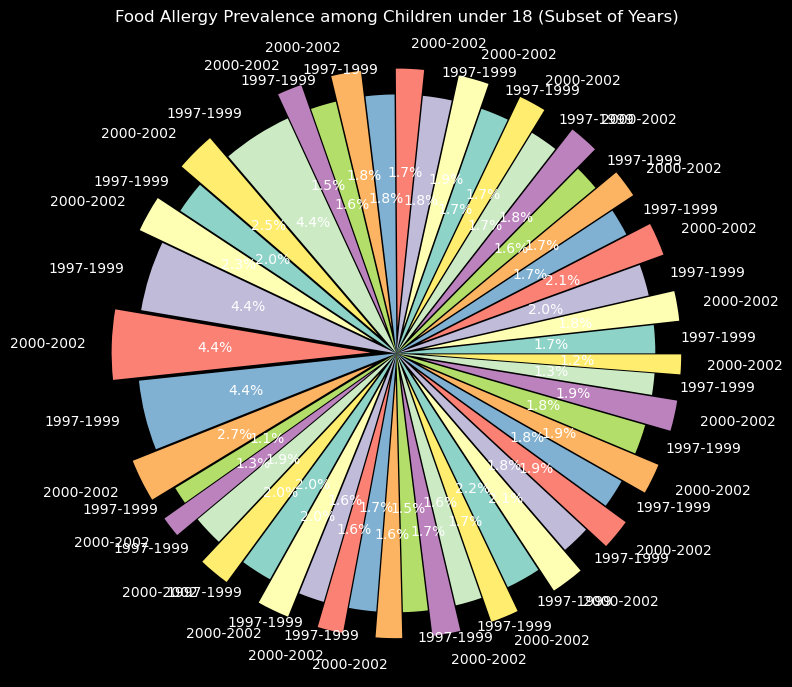

In [94]:
food_allergy_subset = health_cond[(health_cond['PANEL'] == 'Food allergy among persons under 18 years') & 
                                  (health_cond['YEAR'].isin(['1997-1999', '2000-2002']))]

explode = [0.1 if year == '2000-2002' else 0 for year in food_allergy_subset['YEAR']]

plt.figure(figsize=(8, 8))
plt.pie(food_allergy_subset['ESTIMATE'], labels=food_allergy_subset['YEAR'], autopct='%1.1f%%', explode=explode)
plt.title('Food Allergy Prevalence among Children under 18 (Subset of Years)')
plt.tight_layout()
plt.show()


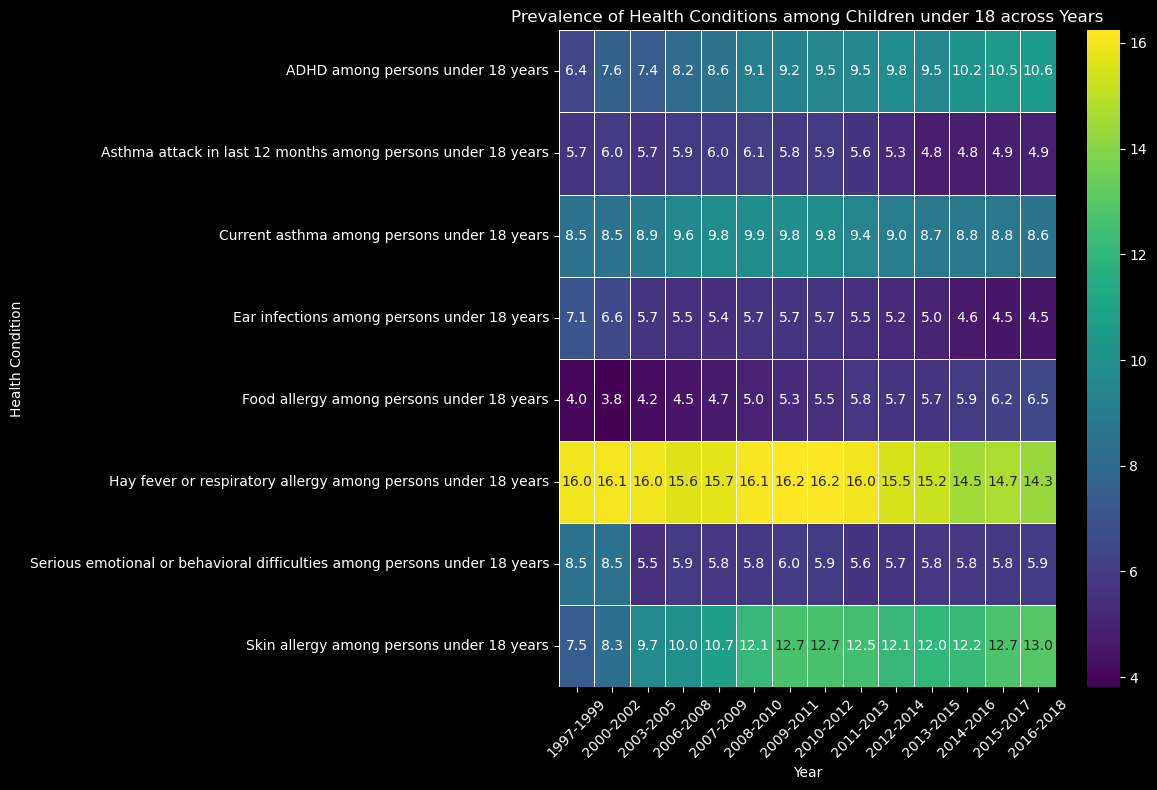

In [95]:
health_conditions = [
    'Current asthma among persons under 18 years',
    'ADHD among persons under 18 years',
    'Asthma attack in last 12 months among persons under 18 years',
    'Serious emotional or behavioral difficulties among persons under 18 years',
    'Food allergy among persons under 18 years',
    'Skin allergy among persons under 18 years',
    'Hay fever or respiratory allergy among persons under 18 years',
    'Ear infections among persons under 18 years'
]

health_cond_subset = health_cond[health_cond['PANEL'].isin(health_conditions)]
heatmap_data = health_cond_subset.pivot_table(values='ESTIMATE', index='PANEL', columns='YEAR')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
plt.title('Prevalence of Health Conditions among Children under 18 across Years')
plt.xlabel('Year')
plt.ylabel('Health Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


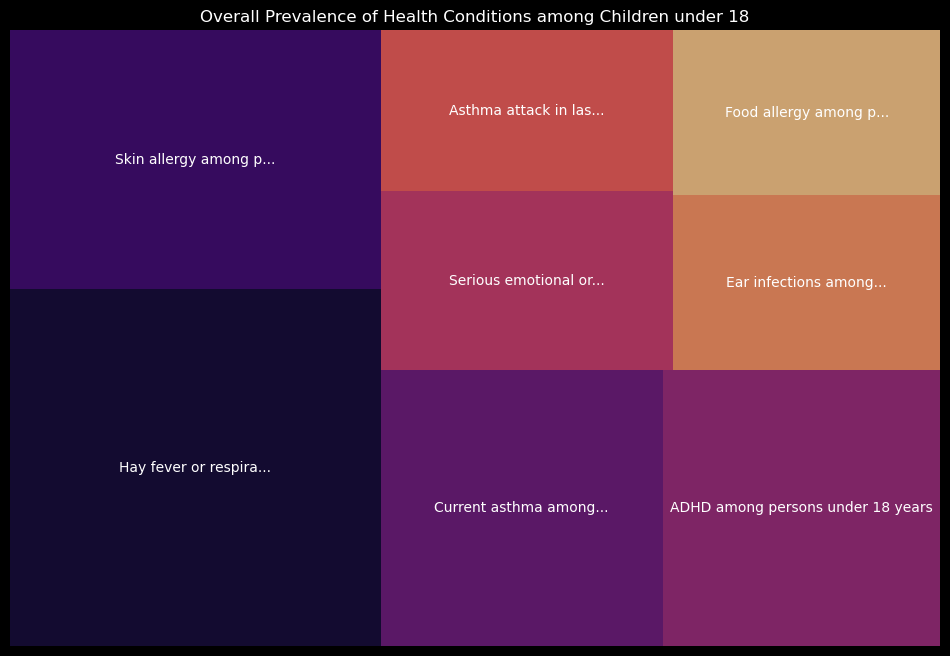

In [124]:
overall_prevalence = health_cond_subset.groupby('PANEL')['ESTIMATE'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
squarify.plot(sizes=overall_prevalence, label=[label[:20] + '...' if len(label) > 35 else label for label in overall_prevalence.index],
              color=sns.color_palette('magma', n_colors=len(overall_prevalence)),
              alpha=0.8)
plt.title('Overall Prevalence of Health Conditions among Children under 18')
plt.axis('off')
plt.show()

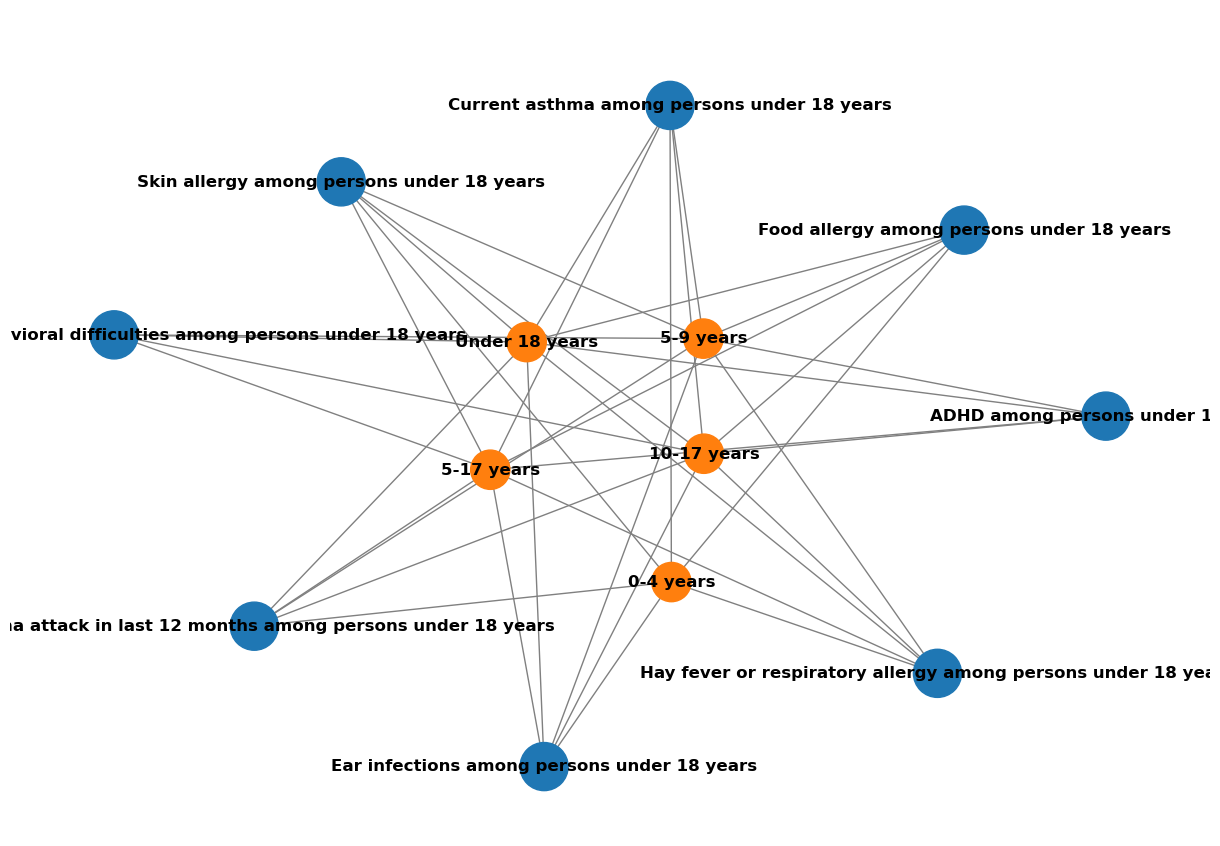

In [97]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for condition in health_cond['PANEL'].unique():
    G.add_node(condition)
for age_group in health_cond['AGE'].unique():
    G.add_node(age_group)
for _, row in health_cond.iterrows():
    G.add_edge(row['PANEL'], row['AGE'])

node_colors = ['#1f77b4' if node in health_conditions else '#ff7f0e' for node in G.nodes()]
node_sizes = [1200 if node in health_conditions else 800 for node in G.nodes()]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, font_size=12, font_weight='bold', edge_color='gray')
plt.title('Network Graph of Health Conditions and Age Groups', fontsize=16)
plt.gca().set_facecolor('black')  
plt.grid(False)  
plt.box(False)  
plt.show()

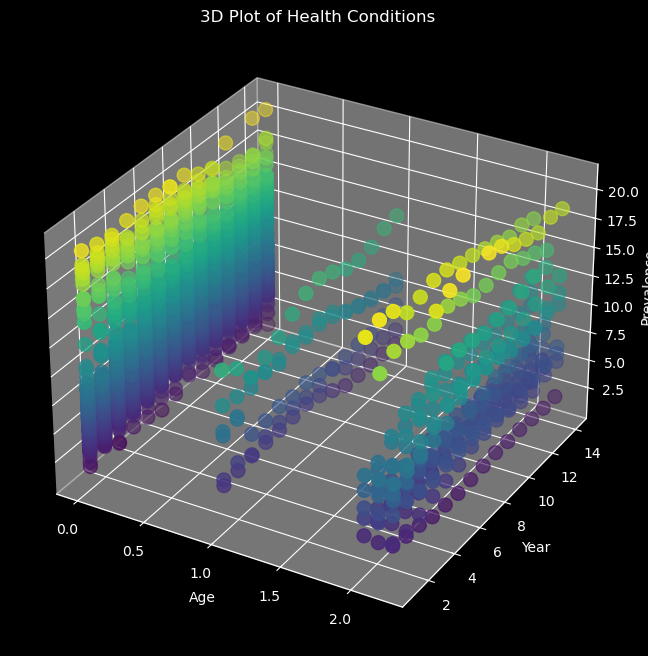

In [98]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(health_cond['AGE_NUM'], health_cond['YEAR_NUM'], health_cond['ESTIMATE'], c=health_cond['ESTIMATE'], cmap='viridis', s=100)
ax.set_xlabel('Age')
ax.set_ylabel('Year')
ax.set_zlabel('Prevalence')
ax.set_title('3D Plot of Health Conditions')
plt.show()